In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configure seaborn for better visuals
sns.set(style="whitegrid")


C:\Users\FUAT\AppData\Local\Temp\ipykernel_6788\996531919.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='article_count', y='publisher', data=top_publishers, palette='viridis')


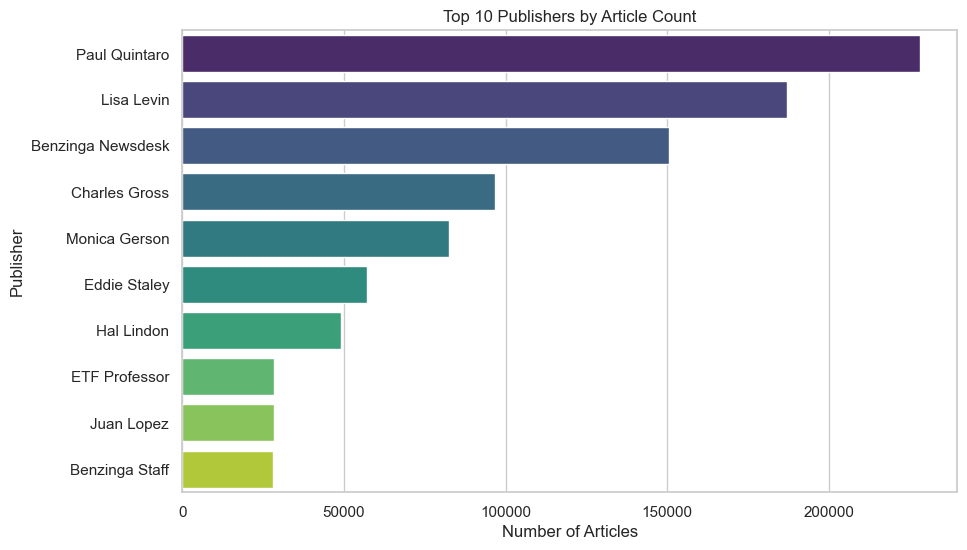

,publisher,article_count
0,Paul Quintaro,228373
1,Lisa Levin,186979
2,Benzinga Newsdesk,150484
3,Charles Gross,96732
4,Monica Gerson,82380
...,...,...
1029,MoneyGeek,1
1030,muathe,1
1031,Robert Morris,1
1032,LeftCoastHedgie,1


In [3]:
def publisher_contribution(df):
    """
    Analyzes the contribution of publishers to the dataset.

    Args:
        df (pd.DataFrame): The input data.

    Returns:
        pd.DataFrame: A DataFrame with publisher contribution information.
    """
    publisher_counts = df['publisher'].value_counts().reset_index()
    publisher_counts.columns = ['publisher', 'article_count']
    
    top_publishers = publisher_counts.head(10)
    plt.figure(figsize=(10, 6))
    sns.barplot(x='article_count', y='publisher', data=top_publishers, palette='viridis')
    plt.title('Top 10 Publishers by Article Count')
    plt.xlabel('Number of Articles')
    plt.ylabel('Publisher')
    plt.savefig('publisher_contribution.png')
    plt.show()
    return publisher_counts


df = pd.read_csv('../data/raw_analyst_ratings.csv')  # Load your dataset
publisher_contribution(df)


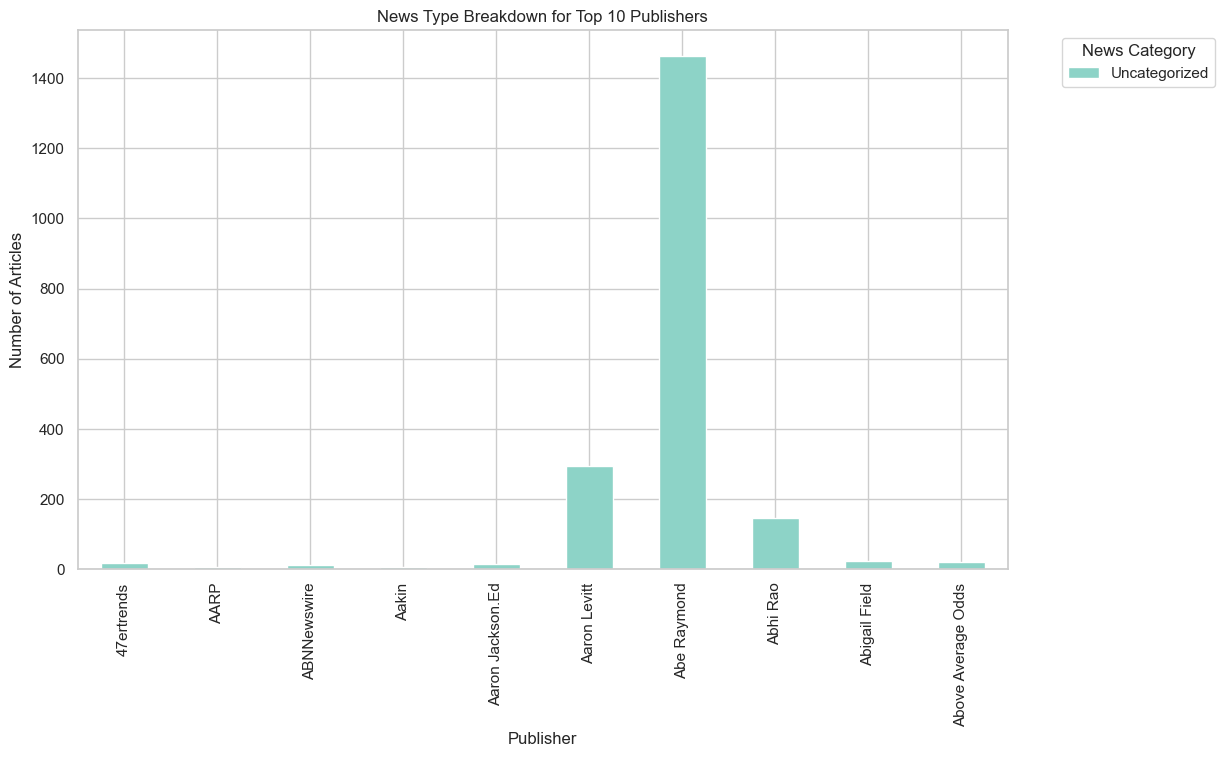

news_type,Uncategorized,most_common_category
publisher,,
47ertrends,18,Uncategorized
AARP,7,Uncategorized
ABNNewswire,13,Uncategorized
Aakin,5,Uncategorized
Aaron Jackson.Ed,16,Uncategorized
...,...,...
vic@forextraininggroup.com,1,Uncategorized
vishwanath@benzinga.com,1830,Uncategorized
vivek.proactive@gmail.com,120,Uncategorized


In [5]:
def publisher_news_type_analysis(df, categories_column='news_type'):
    """
    Analyzes the news type distribution among publishers.

    Args:
        df (pd.DataFrame): The input data.
        categories_column (str, optional): The column containing news categories. Defaults to 'news_type'.

    Returns:
        pd.DataFrame: A DataFrame with news type distribution information.
    """
    if categories_column not in df.columns:
        df[categories_column] = 'Uncategorized' 
    
    publisher_news_type = df.groupby(['publisher', categories_column]).size().unstack(fill_value=0)
    publisher_news_type['most_common_category'] = publisher_news_type.idxmax(axis=1)
    
    top_publishers = publisher_news_type.head(10)
    top_publishers.drop('most_common_category', axis=1).plot(kind='bar', stacked=True, figsize=(12, 7), colormap='Set3')
    plt.title('News Type Breakdown for Top 10 Publishers')
    plt.xlabel('Publisher')
    plt.ylabel('Number of Articles')
    plt.legend(title='News Category', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.savefig('publisher_news_type_breakdown.png')  
    plt.show()
    return publisher_news_type

df = pd.read_csv('../data/raw_analyst_ratings.csv')  # Load your dataset
publisher_news_type_analysis(df)


C:\Users\FUAT\AppData\Local\Temp\ipykernel_6788\623296809.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='article_count', y='domain', data=top_domains, palette='plasma')


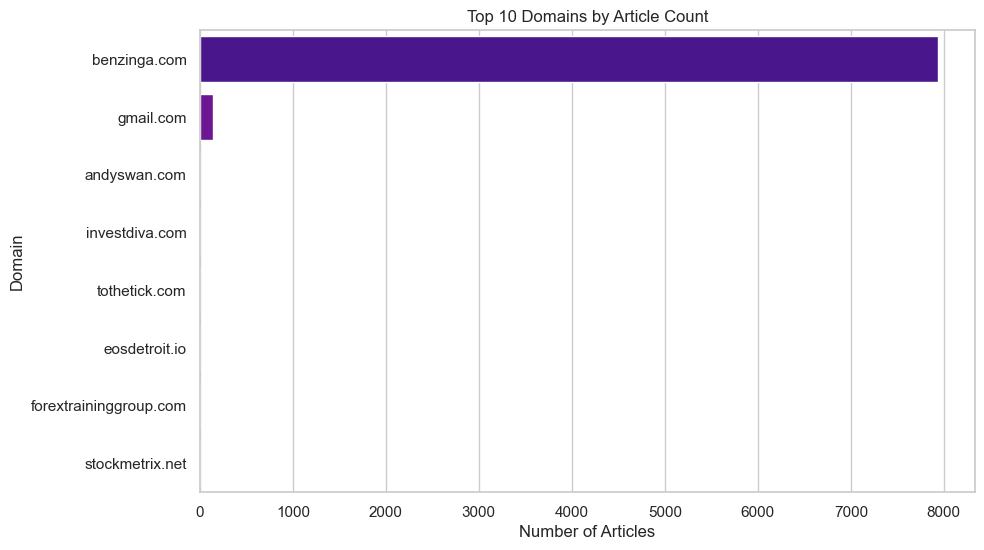

,domain,article_count
0,benzinga.com,7937
1,gmail.com,139
2,andyswan.com,5
3,investdiva.com,2
4,tothetick.com,2
5,eosdetroit.io,1
6,forextraininggroup.com,1
7,stockmetrix.net,1


In [6]:
def extract_email_domains(df):
    """
    Extracts email domains from the publisher column.

    Args:
        df (pd.DataFrame): The input data.

    Returns:
        pd.DataFrame: A DataFrame with email domain information.
    """
    df['domain'] = df['publisher'].str.extract(r'@([A-Za-z0-9.-]+)')
    domain_counts = df['domain'].value_counts().reset_index()
    domain_counts.columns = ['domain', 'article_count']
    
    top_domains = domain_counts.head(10)
    plt.figure(figsize=(10, 6))
    sns.barplot(x='article_count', y='domain', data=top_domains, palette='plasma')
    plt.title('Top 10 Domains by Article Count')
    plt.xlabel('Number of Articles')
    plt.ylabel('Domain')
    plt.savefig('email_domain_analysis.png')
    plt.show()
    return domain_counts

df = pd.read_csv('../data/raw_analyst_ratings.csv')  # Load your dataset
extract_email_domains(df)


C:\Users\FUAT\AppData\Local\Temp\ipykernel_6788\996531919.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='article_count', y='publisher', data=top_publishers, palette='viridis')


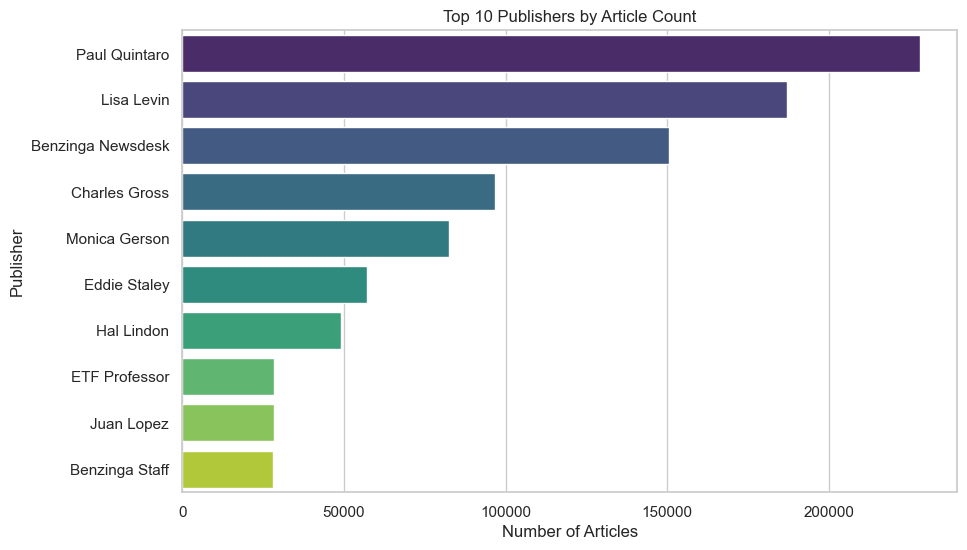

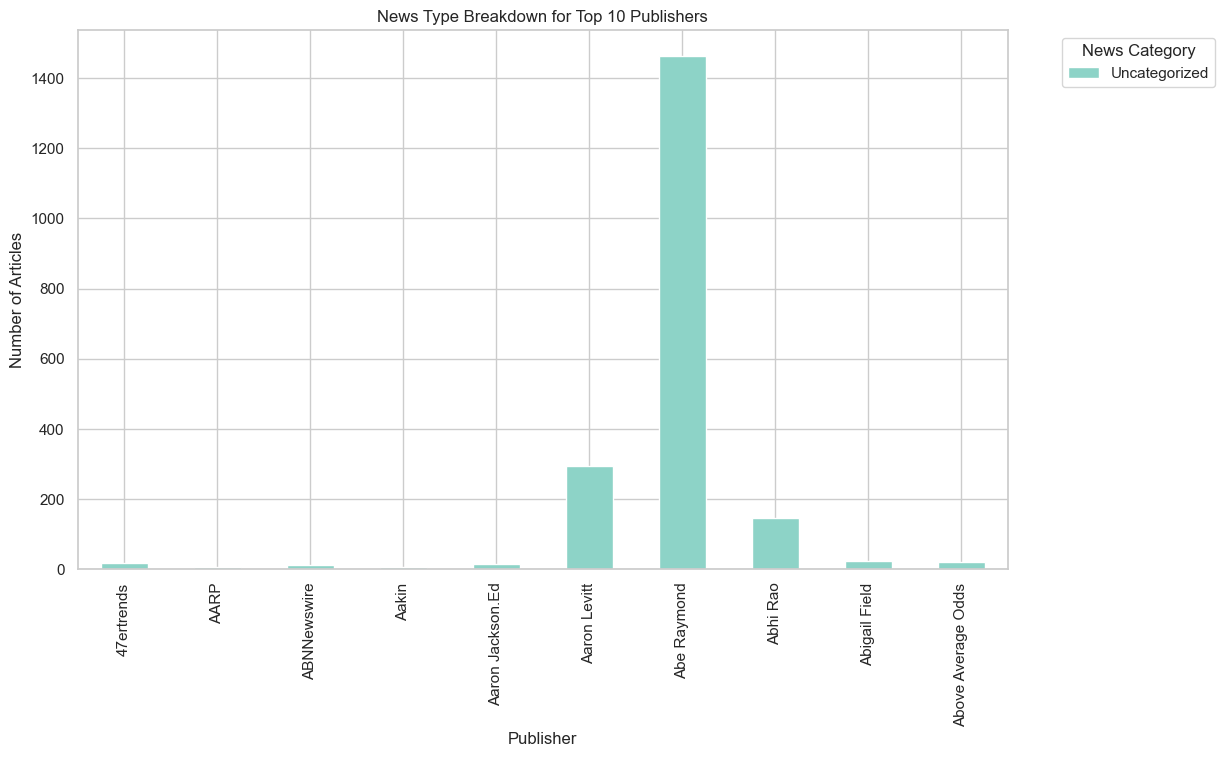

C:\Users\FUAT\AppData\Local\Temp\ipykernel_6788\623296809.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='article_count', y='domain', data=top_domains, palette='plasma')


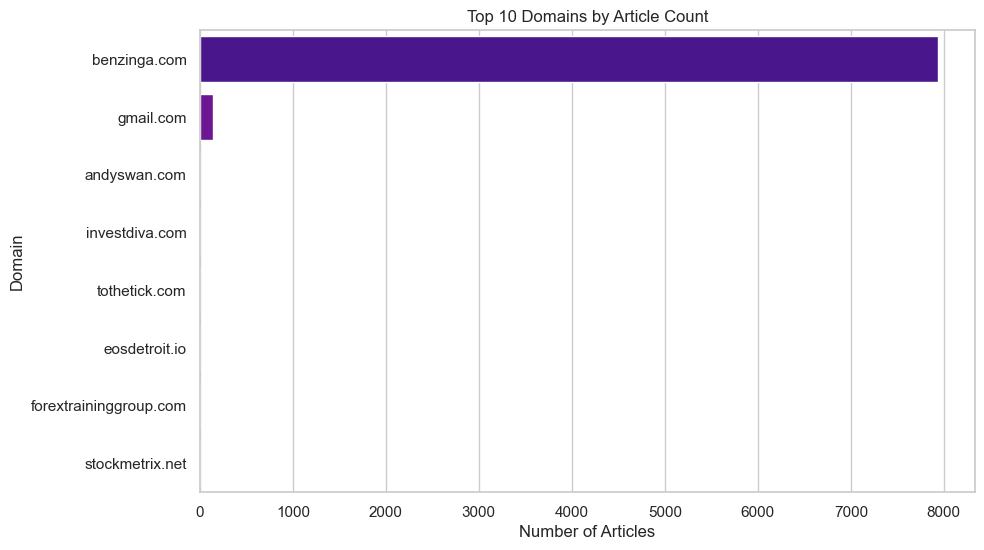

(              publisher  article_count
 0         Paul Quintaro         228373
 1            Lisa Levin         186979
 2     Benzinga Newsdesk         150484
 3         Charles Gross          96732
 4         Monica Gerson          82380
 ...                 ...            ...
 1029          MoneyGeek              1
 1030             muathe              1
 1031      Robert Morris              1
 1032    LeftCoastHedgie              1
 1033     Jeremie Capron              1
 
 [1034 rows x 2 columns],
 news_type                   Uncategorized most_common_category
 publisher                                                     
 47ertrends                             18        Uncategorized
 AARP                                    7        Uncategorized
 ABNNewswire                            13        Uncategorized
 Aakin                                   5        Uncategorized
 Aaron Jackson.Ed                       16        Uncategorized
 ...                                   ...  

In [8]:
def publisher_analysis(df, categories_column='news_type'):
    """
    Analyzes publisher contribution, news type distribution, and email domain information.

    Args:
        df (pd.DataFrame): The input data.
        categories_column (str, optional): The column containing news categories. Defaults to 'news_type'.

    Returns:
        tuple: A tuple containing publisher contribution, news type distribution, and email domain information.
    """
    publisher_counts = publisher_contribution(df)
    publisher_news_type = publisher_news_type_analysis(df, categories_column)
    domain_counts = extract_email_domains(df)
    return publisher_counts, publisher_news_type, domain_counts

df = pd.read_csv('../data/raw_analyst_ratings.csv')  # Load your dataset
publisher_analysis(df)
